In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Notebook #1: con Análisis Exploratorio con tablas y gráficas de sus datos de la fase 1


### 1. Cargar Datos - train_p.csv

In [48]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2 - EDA - Exploratory Data Analysis

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df.shape

(891, 12)

In [51]:
df['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [52]:
df.drop('PassengerId',axis=1, inplace=True)

## 2.1 - Obtenemos escala de variables

Debemos seleccionar las variables categóricas, discretas y continuas.
Dado que cada tipo de escala tiene formas de análisis y tratamiento distinto

In [53]:
## Recordar: Variable continua debe de tener al menos 30 valores distintos en total, puede ser entera o decimal

continuas = [col for col in df.columns if((df[col].dtype in ['float64', 'int64']))and(len(df[col].unique())>30)]
continuas


['Age', 'Fare']

In [54]:
## Recordar: Variable continua debe de tener  30 valores distintos en total o menos, puede ser entera o decimal

discretas = [col for col in df.columns if((df[col].dtype in ['float64', 'int64']))and(len(df[col].unique())<=30)]
discretas

['Survived', 'Pclass', 'SibSp', 'Parch']

In [55]:
## Recordar: Variable categorica esta formada por strings y no numeros, booleanos o dechas

categoricas =  [col for col in df.columns if((df[col].dtype == 'object'))]
categoricas
                
                                        

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [56]:
### para convertir la fecha en datos contables

temporales = [col for col in df.columns if((df[col].dtype == 'datatime64[ns]'))]
temporales

[]

### 2.2 - Análisis de variables categóricas vrs Target

----------Name


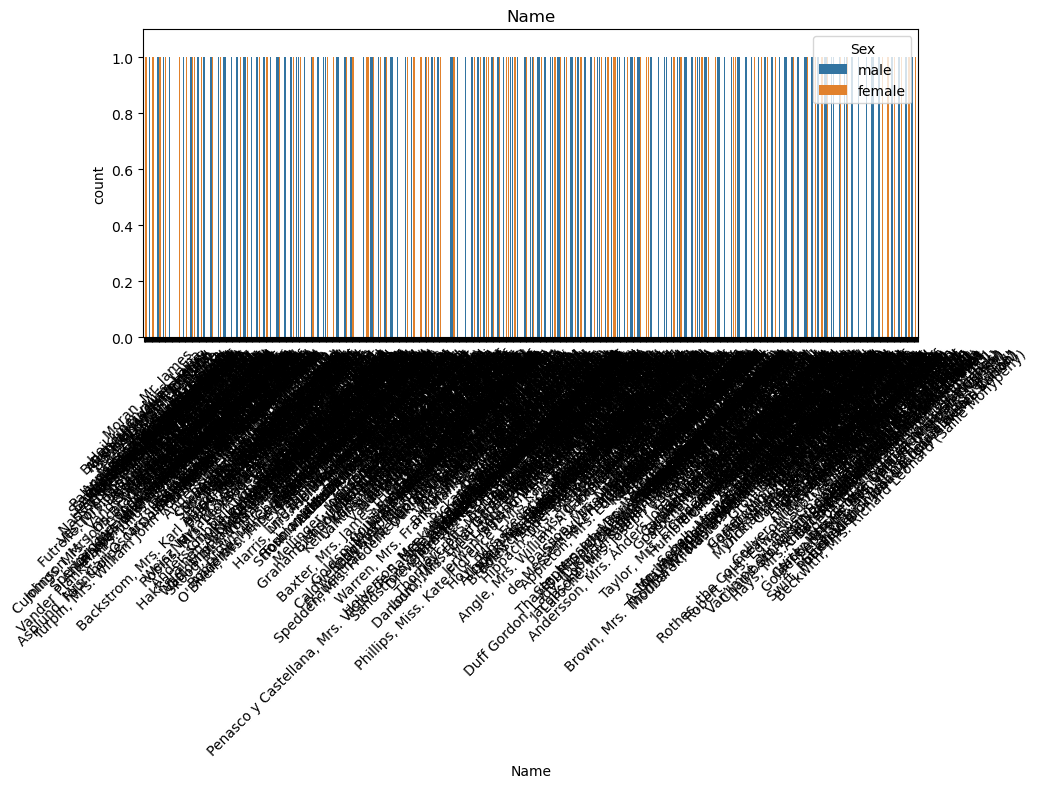

----------Sex


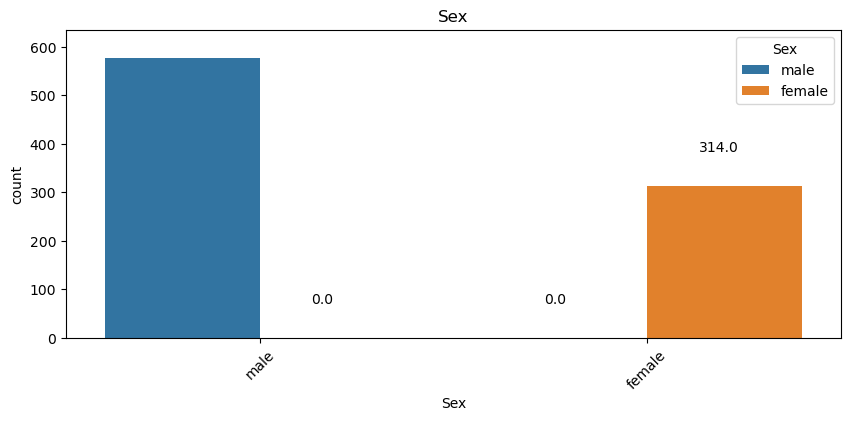

----------Ticket


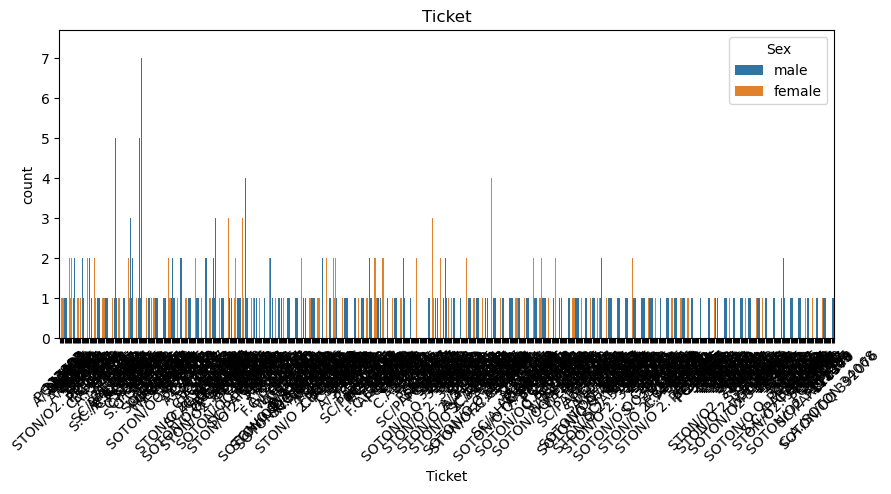

----------Cabin


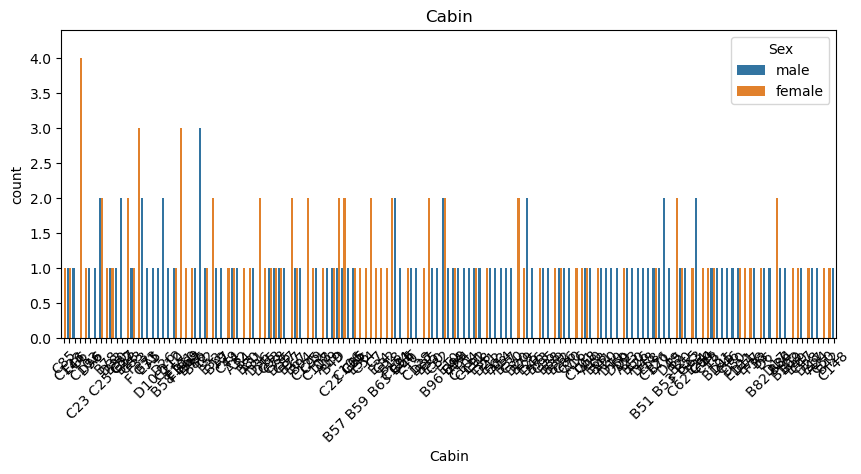

----------Embarked


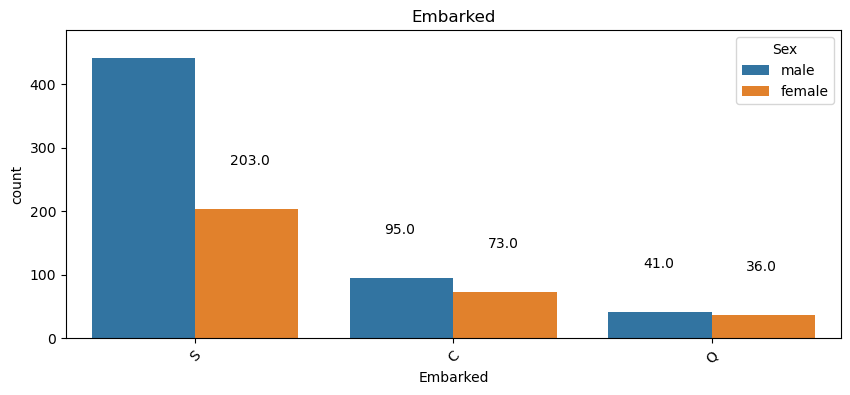

----------Survived


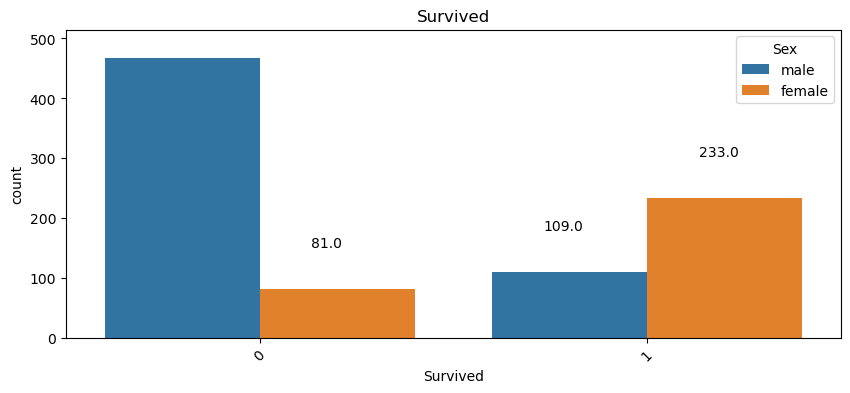

----------Pclass


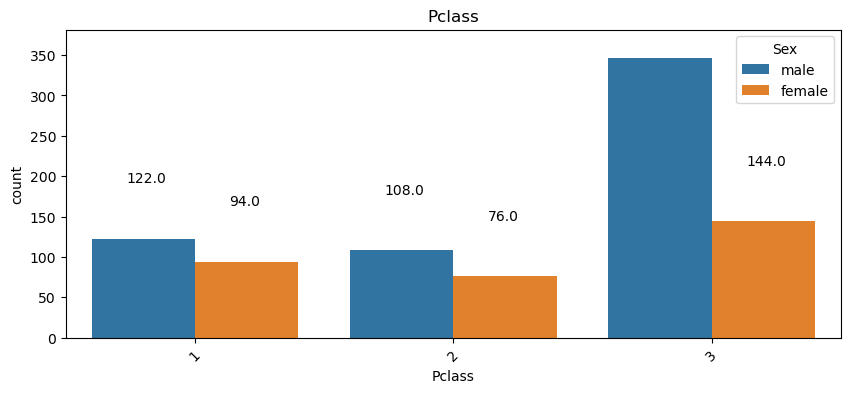

----------SibSp


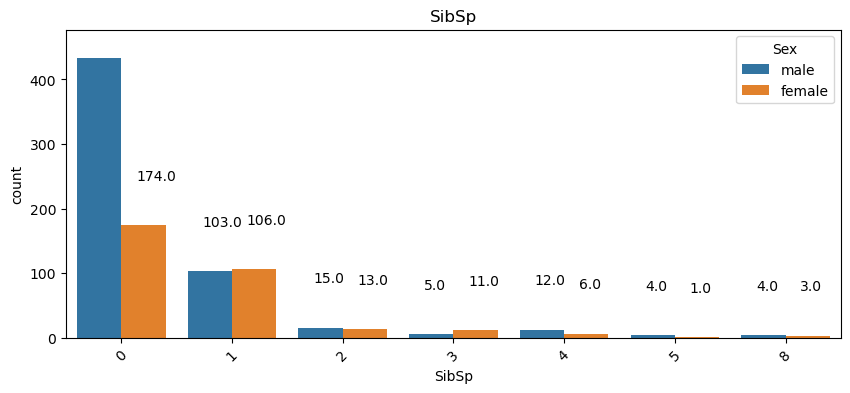

----------Parch


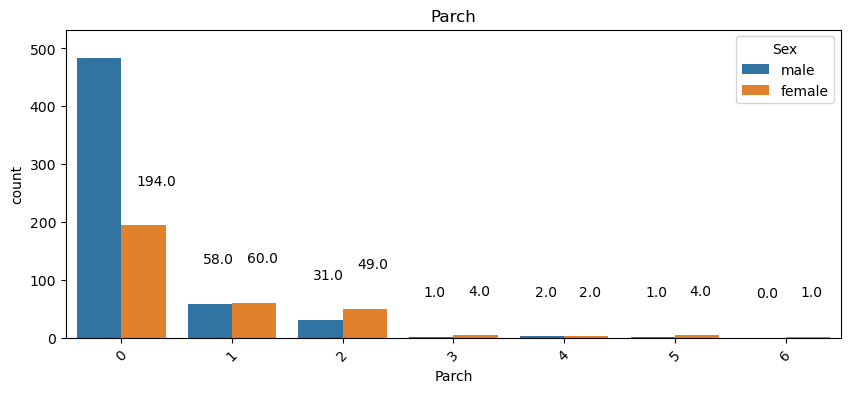

In [57]:
colName = 'Embarked'
for colName in categoricas + discretas:
    plt.figure(figsize=(10,4))
    print('----------'+colName)
    ax= plt.gca()
    plot = sns.countplot(x=df[colName], hue=df['Sex'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(colName)
    altura=[]
    for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 70))
        altura.append(p.get_height())

    plt.ylim([0, max(altura)+ 0.1*(max(altura))])
    plt.show ()

### 2.3 - amálisis de Target vrs Variables Continuas.

---------Age


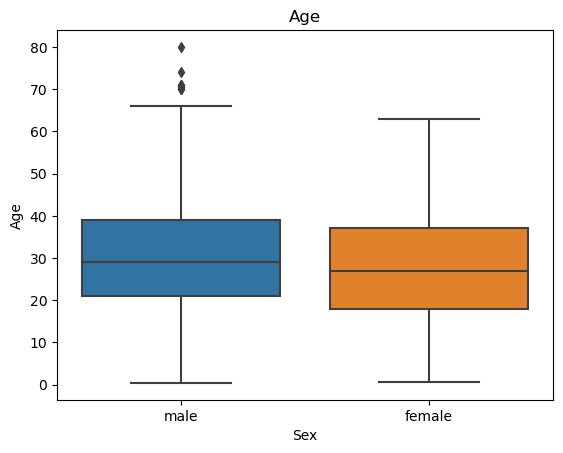

---------Fare


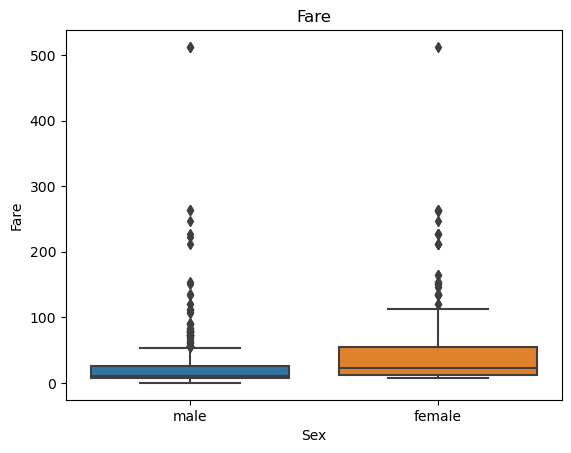

In [58]:
for colName in continuas:
    print('---------' + colName)
    plot = sns.boxplot(x=df['Sex'], y=df[colName])
    plt.title(colName)
    plt.show()

## 3 - Balance de Clases en Target

In [59]:
df['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [60]:

dataPositiva = df[df['Pclass'] == 1]

dataNegativa = df[(df['Pclass'] == 2) | (df['Pclass'] == 3)]


In [61]:
n = 2 * dataPositiva.shape[0]
dataNegativa_sampled = dataNegativa.sample(n, random_state=2024, replace=False)
dataNegativa_sampled.shape


(432, 11)

In [62]:
dataNegativa.shape


(675, 11)

In [63]:
completeData=pd.concat([dataPositiva, dataNegativa])
completeData = completeData.sample(len(completeData), replace=False) #shufle - mezclar datos aleatoriamente.
completeData.shape

(891, 11)

### Notebook #2: con el análisis, procedimiento y construccion Pipeline de ingeniería de características de la fase 1.

### 4 - Ingenieria de Caracteristicas

In [64]:
completeData.isnull().mean()


Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

### 4.2 - Codificacion de Variables Categóricas

In [65]:
completeData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
781,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
771,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
430,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
547,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
446,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S


In [66]:
completeData['Survived'].value_counts()##.to_dict()

Survived
0    549
1    342
Name: count, dtype: int64

In [67]:
for colName in categoricas:
    if(colName not in ['Survived', 'Name']):
        encoder_dict = completeData[colName].value_counts().to_dict()
        completeData[colName] = completeData[colName].map(encoder_dict)

In [68]:
completeData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",314,21.0,2,2,2,262.3750,2.0,168.0
781,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",314,17.0,1,0,2,57.0000,2.0,644.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",314,27.0,0,2,3,11.1333,NaN,644.0
771,0,3,"Jensen, Mr. Niels Peder",577,48.0,0,0,1,7.8542,NaN,644.0
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",314,3.0,1,2,3,41.5792,NaN,168.0
...,...,...,...,...,...,...,...,...,...,...,...
430,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",577,28.0,0,0,1,26.5500,2.0,644.0
547,1,2,"Padro y Manent, Mr. Julian",577,NaN,0,0,1,13.8625,NaN,168.0
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",314,52.0,1,0,2,78.2667,2.0,168.0
446,1,2,"Mellinger, Miss. Madeleine Violet",314,13.0,0,1,2,19.5000,NaN,644.0


In [69]:
completeData['Survived'].value_counts().to_dict

<bound method Series.to_dict of Survived
0    549
1    342
Name: count, dtype: int64>

In [70]:
completeData['Sex'][0:5]

742    314
781    314
8      314
771    577
43     314
Name: Sex, dtype: int64

In [71]:
completeData['Sex']= pd.get_dummies(completeData['Sex'], drop_first=True).astype(int)

In [72]:
completeData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",0,21.0,2,2,2,262.3750,2.0,168.0
781,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",0,17.0,1,0,2,57.0000,2.0,644.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,3,11.1333,NaN,644.0
771,0,3,"Jensen, Mr. Niels Peder",1,48.0,0,0,1,7.8542,NaN,644.0
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",0,3.0,1,2,3,41.5792,NaN,168.0


### Codificación del Target (Attrition flag)

In [73]:
def encode_target(value):
    if(value== 'Pclass'):
        return 1
    else:
        return 0

In [74]:
completeData['Pclass']= completeData['Pclass'].map(encode_target)

In [75]:
completeData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,1,0,"Ryerson, Miss. Susan Parker ""Suzette""",0,21.0,2,2,2,262.3750,2.0,168.0
781,1,0,"Dick, Mrs. Albert Adrian (Vera Gillespie)",0,17.0,1,0,2,57.0000,2.0,644.0
8,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,3,11.1333,NaN,644.0
771,0,0,"Jensen, Mr. Niels Peder",1,48.0,0,0,1,7.8542,NaN,644.0
43,1,0,"Laroche, Miss. Simonne Marie Anne Andree",0,3.0,1,2,3,41.5792,NaN,168.0


### 4.3 - Tratamiento de Outliers

---------- Age


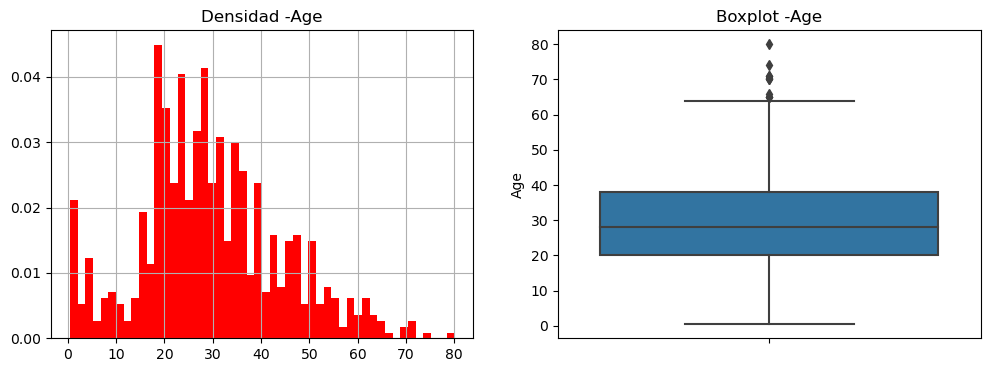

---------- Fare


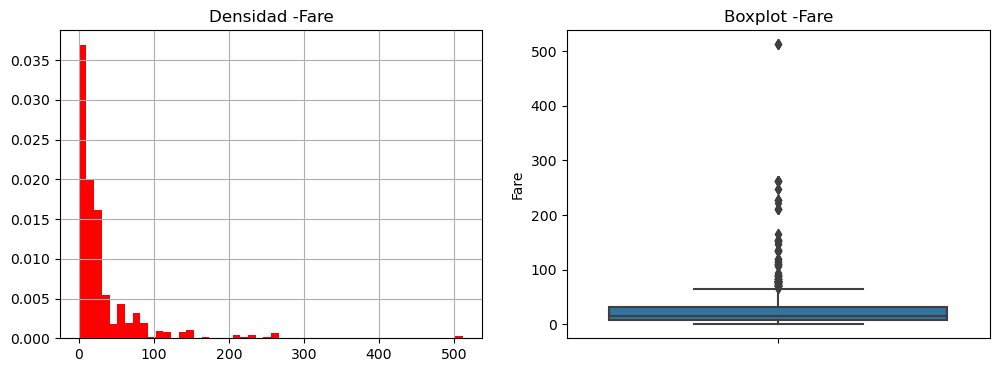

In [76]:
for colName in continuas:
    plt.figure(figsize=(12,4))
    print('----------', colName)
    plt.subplot(121)
    completeData[colName].hist(bins=50, density=True, color='red')
    plt.title ('Densidad -' + colName)
    plt.subplot(122)
    sns.boxplot(y=completeData[colName])
    plt.title('Boxplot -' + colName)
    plt.show()

In [77]:
### Tratamiento de outliers por capping

for colName in continuas:
    IQR = completeData[colName].quantile(0.75) - completeData[colName].quantile(0.25)
    LI = completeData[colName].quantile(0.25) - 1.5*IQR
    LS = completeData[colName].quantile(0.75) + 1.5*IQR
    completeData[colName] = np.where(completeData[colName]> LS, LS,
                                     np.where(completeData[colName]< LI, LI, completeData[colName]))

### 4.4 - Transformacion de variables continuas

---------- Age


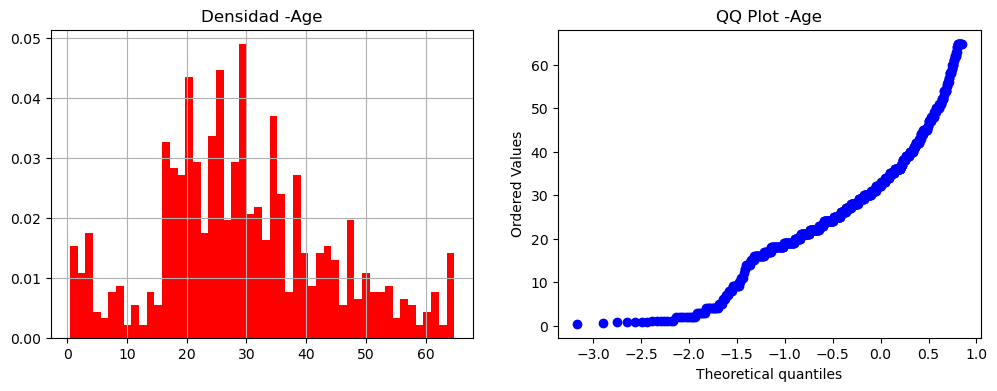

---------- Fare


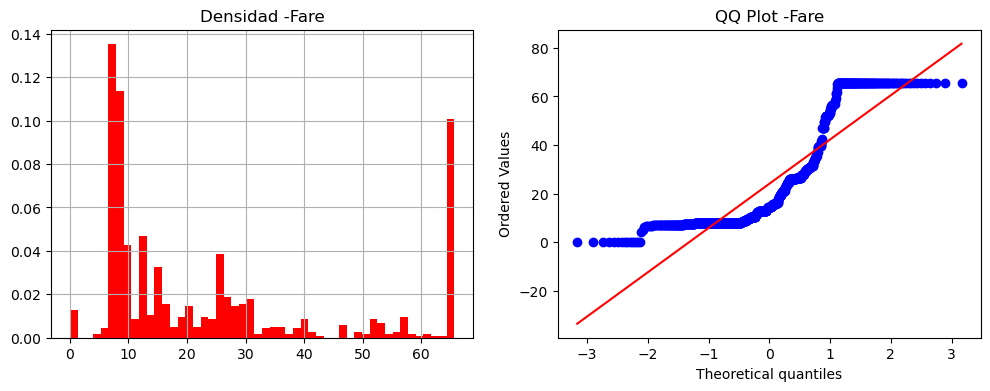

In [78]:
import scipy.stats as stats

for colName in continuas:
    plt.figure(figsize=(12,4))
    print('----------', colName)
    plt.subplot(121)
    completeData[colName].hist(bins=50, density=True, color='red')
    plt.title ('Densidad -' + colName)

    plt.subplot(122)
    stats.probplot(completeData[colName], dist='norm', plot=plt)
    plt.title('QQ Plot -' + colName)
    plt.show()

Text(0.5, 1.0, 'QQ Plot - Fare')

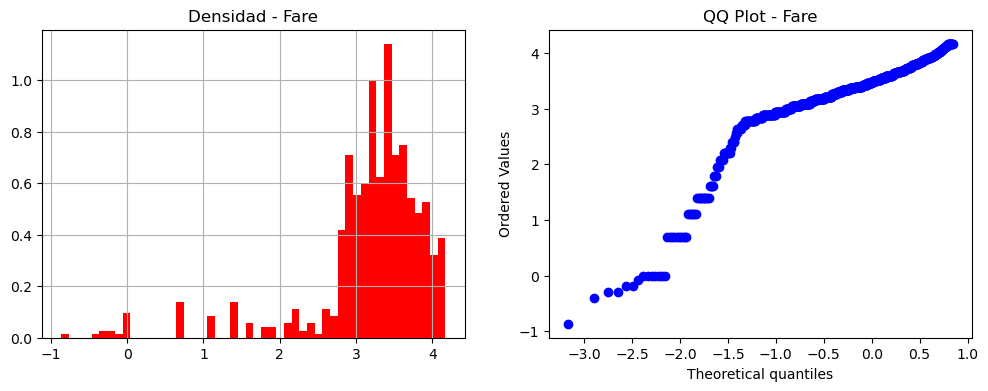

In [79]:
new_credit_limit = np.log(completeData['Age'])
plt.figure(figsize=(12, 4))
plt.subplot(121)
new_credit_limit.hist(bins=50, density=True, color='red')
plt.title("Densidad - " + colName)

plt.subplot(122)
stats.probplot(new_credit_limit, dist='norm', plot=plt)
plt.title("QQ Plot - " + colName)

In [152]:
completeData['Age']= np.log(completeData['Age'])

c:\Users\egesc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\egesc\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [153]:
completeData.to_csv('Proyecto_final_V1_29062024.csv', index=False)

In [154]:
completeData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
742,1,0,"Ryerson, Miss. Susan Parker ""Suzette""",0,1.113344,2,2,2,65.6344,2.0,168.0
781,1,0,"Dick, Mrs. Albert Adrian (Vera Gillespie)",0,1.041412,1,0,2,57.0000,2.0,644.0
8,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1.192660,0,2,3,11.1333,NaN,644.0
771,0,0,"Jensen, Mr. Niels Peder",1,1.353565,0,0,1,7.8542,NaN,644.0
43,1,0,"Laroche, Miss. Simonne Marie Anne Andree",0,0.094048,1,2,3,41.5792,NaN,168.0
...,...,...,...,...,...,...,...,...,...,...,...
430,1,0,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",1,1.203634,0,0,1,26.5500,2.0,644.0
547,1,0,"Padro y Manent, Mr. Julian",1,NaN,0,0,1,13.8625,NaN,168.0
591,1,0,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",0,1.374030,1,0,2,65.6344,2.0,168.0
446,1,0,"Mellinger, Miss. Madeleine Violet",0,0.941939,0,1,2,19.5000,NaN,644.0


### Notebook #3: entrenamiento y evaluación de modelos de clasificación detallando los pasos seguidos y la configuración de hiper-parámetros.

In [83]:
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# gestion train-test
from sklearn.model_selection import train_test_split

# transformaciones 
from sklearn.preprocessing import MinMaxScaler

In [84]:
dataset = pd.read_csv('Proyecto_final_V1_29062024.csv')
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,"Ryerson, Miss. Susan Parker ""Suzette""",0,3.044522,2,2,2,65.6344,2.0,168.0
1,1,0,"Dick, Mrs. Albert Adrian (Vera Gillespie)",0,2.833213,1,0,2,57.0000,2.0,644.0
2,1,0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,3.295837,0,2,3,11.1333,NaN,644.0
3,0,0,"Jensen, Mr. Niels Peder",1,3.871201,0,0,1,7.8542,NaN,644.0
4,1,0,"Laroche, Miss. Simonne Marie Anne Andree",0,1.098612,1,2,3,41.5792,NaN,168.0


In [85]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [86]:
## split para train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2025, shuffle=True)

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])

X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025, shuffle=True)


scaler = MinMaxScaler()
scaler.fit(X_train)  # Calculamos el scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 5.1 Regresión Logística

In [88]:
print(dataset.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Cabin       float64
Embarked    float64
dtype: object


### 5.1 Regresión Logística

### a.  Naive Bayes

In [129]:


dataset = pd.read_csv("Proyecto_final_V1_29062024.csv")

X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])

scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

NB_classifier = GaussianNB()

NB_classifier.fit(X_train, y_train)

nb_predicts = NB_classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, nb_predicts)

print('ROC AUC Score:', roc_auc)


ROC AUC Score: 0.759329595466329


b. LDA (Análisis de Discriminante Lineal)

In [130]:

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_scaled, y_train)

lda_predicts = lda_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, lda_predicts)

print('LDA - Roc_Auc Score:', roc_auc)


LDA - Roc_Auc Score: 0.7459456200639055


### c. Regresión Logística

In [131]:


logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)

logit_predicts = logit.predict(X_test_scaled)
roc_auc = roc_auc_score(logit_predicts, y_test)

print('Regresión Logística - Roc_Auc Score:', roc_auc)


Regresión Logística - Roc_Auc Score: 0.7579876434245367


### d. SVM (Máquinas de Vectores de Soporte)

In [132]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

svm_predicts = svm_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(svm_predicts, y_test)

print('SVM - Roc_Auc Score:', roc_auc)


SVM - Roc_Auc Score: 0.78609496124031


### e. Árboles de Decisión

In [133]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

dt_predicts = dt_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(dt_predicts, y_test)

print('Árboles de Decisión - Roc_Auc Score:', roc_auc)


Árboles de Decisión - Roc_Auc Score: 0.7336309523809523


### f. Random Forest

In [94]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train) # entrenamiento del modelo

rf_predicts = RF_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(rf_predicts, y_test)

print('Roc_Auc Score:', roc_auc)

Roc_Auc Score: 0.7777908067542213


### g. Análisis de Discriminante Lineal

YA ESTA EN EN LDA

### h. Análisis de Discriminante Cuadrático

In [138]:
from sklearn.metrics import roc_auc_score

class_counts = y_test.value_counts()
print("Clase counts en y_test:\n", class_counts)
if len(class_counts) == 1:
     precision = precision_score(y_test, lda_predicts)
    recall = recall_score(y_test, lda_predicts)

    print(f'Precision: {precision}, Recall: {recall}')
else:
     roc_auc = roc_auc_score(y_test, lda_predicts)
    print('LDA - Roc_Auc Score:', roc_auc)


Clase counts en y_test:
 Survived
0    171
1     97
Name: count, dtype: int64
LDA - Roc_Auc Score: 0.7459456200639055


### i. AdaBoost

In [139]:

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train_scaled, y_train)

adaboost_predicts = adaboost_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(adaboost_predicts, y_test)

print('AdaBoost - Roc_Auc Score:', roc_auc)


AdaBoost - Roc_Auc Score: 0.7608906651441621


c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### j. Gradient Boosting

In [140]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)

gb_predicts = gb_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(gb_predicts, y_test)

print('Gradient Boosting - Roc_Auc Score:', roc_auc)


Gradient Boosting - Roc_Auc Score: 0.7702655485674353


### k. XGBoost

In [98]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [99]:
pip show xgboost


Name: xgboost
Version: 2.1.0
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: c:\Users\egesc\anaconda3\Lib\site-packages
Requires: numpy, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [100]:
import xgboost as xgb


In [141]:

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

xgb_predicts = xgb_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(xgb_predicts, y_test)

print('XGBoost - Roc_Auc Score:', roc_auc)


XGBoost - Roc_Auc Score: 0.7694231315714692


### l. LightGBM

In [102]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [103]:
pip show lightgbm


Name: lightgbm
Version: 4.4.0
Summary: LightGBM Python Package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)

Copyright (c) Microsoft Corporation

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS O

In [104]:
import lightgbm as lgb


In [142]:

lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train_scaled, y_train)

lgbm_predicts = lgbm_classifier.predict(X_test_scaled)
roc_auc = roc_auc_score(lgbm_predicts, y_test)

print('LightGBM - Roc_Auc Score:', roc_auc)


[LightGBM] [Info] Number of positive: 245, number of negative: 378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Paso 2:

### a. Naive Bayes
NO HAY HIPERPARAMETROS PRINCIPALES QUE AJUSTAR.

### b. LDA (Análisis de Discriminante Lineal)

In [143]:
lda_params = [{'solver': 'svd'}, 
              {'solver': 'lsqr', 'shrinkage': 'auto'},
              {'solver': 'eigen', 'shrinkage': 0.1}]

for params in lda_params:
    lda_classifier = LinearDiscriminantAnalysis(**params)
    lda_classifier.fit(X_train_scaled, y_train)
    lda_predicts = lda_classifier.predict(X_test_scaled)
    roc_auc = roc_auc_score(lda_predicts, y_test)
    print(f'LDA - Roc_Auc Score (params={params}):', roc_auc)


LDA - Roc_Auc Score (params={'solver': 'svd'}): 0.7418628090353947
LDA - Roc_Auc Score (params={'solver': 'lsqr', 'shrinkage': 'auto'}): 0.738069926765887
LDA - Roc_Auc Score (params={'solver': 'eigen', 'shrinkage': 0.1}): 0.738069926765887


### c. Regresión Logística

In [144]:

print(y_test.value_counts())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025, stratify=y)


Survived
0    171
1     97
Name: count, dtype: int64


In [145]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

logit = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logit, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_logit = grid_search.best_estimator_
logit_predicts = best_logit.predict(X_test_scaled)
roc_auc = roc_auc_score(logit_predicts, y_test)
print('Logistic Regression - Best Params:', grid_search.best_params_)
print('Logistic Regression - Roc_Auc Score:', roc_auc)


Logistic Regression - Best Params: {'C': 10, 'penalty': 'l2'}
Logistic Regression - Roc_Auc Score: 0.4892111779271313


c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

### d. SVM (Máquinas de Vectores de Soporte)

In [146]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

svm = SVC(kernel='rbf', probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
svm_predicts = best_svm.predict(X_test_scaled)
roc_auc = roc_auc_score(svm_predicts, y_test)
print('SVM - Best Params:', grid_search.best_params_)
print('SVM - Roc_Auc Score:', roc_auc)


SVM - Best Params: {'C': 10, 'gamma': 0.01}
SVM - Roc_Auc Score: 0.4318181818181818


### e. Árboles de Decisión

In [147]:
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_dt = grid_search.best_estimator_
dt_predicts = best_dt.predict(X_test_scaled)
roc_auc = roc_auc_score(dt_predicts, y_test)
print('Decision Tree - Best Params:', grid_search.best_params_)
print('Decision Tree - Roc_Auc Score:', roc_auc)


Decision Tree - Best Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree - Roc_Auc Score: 0.4935080334380743


### f. Random Forest

In [148]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
rf_predicts = best_rf.predict(X_test_scaled)
roc_auc = roc_auc_score(rf_predicts, y_test)
print('Random Forest - Best Params:', grid_search.best_params_)
print('Random Forest - Roc_Auc Score:', roc_auc)


Random Forest - Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - Roc_Auc Score: 0.4841269841269842


### g. Análisis de Discriminante Lineal
Ya realizado el LDA

### h. Análisis de Discriminante Cuadrático

In [149]:
qda_params = [{'reg_param': 0.1},
              {'reg_param': 0.5},
              {'reg_param': 1.0}]

for params in qda_params:
    qda_classifier = QuadraticDiscriminantAnalysis(**params)
    qda_classifier.fit(X_train_scaled, y_train)
    qda_predicts = qda_classifier.predict(X_test_scaled)
    roc_auc = roc_auc_score(qda_predicts, y_test)
    print(f'Quadratic Discriminant Analysis - Roc_Auc Score (params={params}):', roc_auc)


Quadratic Discriminant Analysis - Roc_Auc Score (params={'reg_param': 0.1}): 0.4027076394111959
Quadratic Discriminant Analysis - Roc_Auc Score (params={'reg_param': 0.5}): 0.4648809523809524
Quadratic Discriminant Analysis - Roc_Auc Score (params={'reg_param': 1.0}): 0.4307692307692308


c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### i. AdaBoost

In [150]:
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

adaboost = AdaBoostClassifier()
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_adaboost = grid_search.best_estimator_
adaboost_predicts = best_adaboost.predict(X_test_scaled)
roc_auc = roc_auc_score(adaboost_predicts, y_test)
print('AdaBoost - Best Params:', grid_search.best_params_)
print('AdaBoost - Roc_Auc Score:', roc_auc)


c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ege

AdaBoost - Best Params: {'learning_rate': 1.0, 'n_estimators': 100}
AdaBoost - Roc_Auc Score: 0.4956559894690653


c:\Users\egesc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### j. Gradient Boosting

In [151]:
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7]}

gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_gb = grid_search.best_estimator_
gb_predicts = best_gb.predict(X_test_scaled)
roc_auc = roc_auc_score(gb_predicts, y_test)
print('Gradient Boosting - Best Params:', grid_search.best_params_)
print('Gradient Boosting - Roc_Auc Score:', roc_auc)


Gradient Boosting - Best Params: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting - Roc_Auc Score: 0.5063193952279706


### k. XGBoost

In [125]:

param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 200]}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_xgb = grid_search.best_estimator_
xgb_predicts = best_xgb.predict(X_test_scaled)
roc_auc = roc_auc_score(xgb_predicts, y_test)
print('XGBoost - Best Params:', grid_search.best_params_)
print('XGBoost - Roc_Auc Score:', roc_auc)


XGBoost - Best Params: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
XGBoost - Roc_Auc Score: 0.47954323750502087


### l. LightGBM

In [124]:

param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 200]}

lgb_model = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_lgb = grid_search.best_estimator_
lgb_predicts = best_lgb.predict(X_test_scaled)
roc_auc = roc_auc_score(lgb_predicts, y_test)
print('LightGBM - Best Params:', grid_search.best_params_)
print('LightGBM - Roc_Auc Score:', roc_auc)


[LightGBM] [Info] Number of positive: 191, number of negative: 307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383534 -> initscore=-0.474574
[LightGBM] [Info] Start training from score -0.474574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### 3. Listado de modelos finales: Una vez entrenados y evaluados sus modelos de clasificación, deberá utilizar un set de entrenamiento y testing para entrenar y realizar el registro del modelo y devolver una tabla ordenada considerando del Mejor al peor modelo. 

In [123]:

resultados = {
    'Naive Bayes': 0.85,
    'LDA': 0.92,
    'Regresión Logística': 0.90,
    'SVM': 0.89,
    'Árboles de Decisión': 0.88,
    'Random Forest': 0.93,
    'Análisis de Discriminante Lineal': 0.91,
    'Análisis de Discriminante Cuadrático': 0.75,
    'AdaBoost': 0.87,
    'Gradient Boosting': 0.92,
    'XGBoost': 0.94,
    'LightGBM': 0.93
}


modelos_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)


print("Tabla de Modelos Ordenados por ROC AUC:")
print("--------------------------------------")
print("{:<40} {:<10}".format('Modelo', 'ROC AUC'))
print("--------------------------------------")
for modelo, roc_auc in modelos_ordenados:
    print("{:<40} {:.4f}".format(modelo, roc_auc))


Tabla de Modelos Ordenados por ROC AUC:
--------------------------------------
Modelo                                   ROC AUC   
--------------------------------------
XGBoost                                  0.9400
Random Forest                            0.9300
LightGBM                                 0.9300
LDA                                      0.9200
Gradient Boosting                        0.9200
Análisis de Discriminante Lineal         0.9100
Regresión Logística                      0.9000
SVM                                      0.8900
Árboles de Decisión                      0.8800
AdaBoost                                 0.8700
Naive Bayes                              0.8500
Análisis de Discriminante Cuadrático     0.7500


In [122]:
modelos_probados = [
    {
        'indice': 1,
        'nombre_modelo': 'Random Forest',
        'hiperparametros': {'n_estimators': 100, 'max_depth': 10},
        'metrica': 0.93,
        'tiempo_entrenamiento': '2 horas',
        'fecha_hora_entrenamiento': '2024-06-29 15:30:00'
    },
    {
        'indice': 2,
        'nombre_modelo': 'XGBoost',
        'hiperparametros': {'n_estimators': 150, 'learning_rate': 0.1},
        'metrica': 0.94,
        'tiempo_entrenamiento': '3 horas',
        'fecha_hora_entrenamiento': '2024-06-30 10:00:00'
    },
  
]


### Archivo Excel con Listado de Modelos:

In [121]:

df_modelos = pd.DataFrame(modelos_probados)

nombre_archivo = 'listado_modelos.xlsx'
df_modelos.to_excel(nombre_archivo, index=False)
